<a href="https://colab.research.google.com/github/aeshna25/Predicting-Customer-satisfaction-using-customer-reviews/blob/main/PR_use_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
review_df= pd.read_csv('/content/drive/MyDrive/Data Science for Business Package/5. Public Relations Department/amazon_alexa.tsv', sep='\t')

In [ ]:
review_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


## Understanding data
Statistical and visualization (wordcloud, univariant, bivariant information)

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
review_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


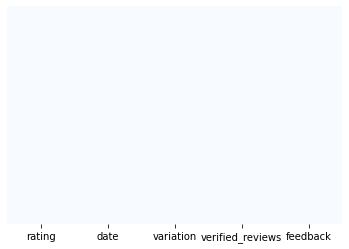

In [ ]:
#missing values
sns.heatmap(review_df.isnull(),yticklabels= False, cbar=False, cmap='Blues')

No missing data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc100a3f4d0>,
      dtype=object)

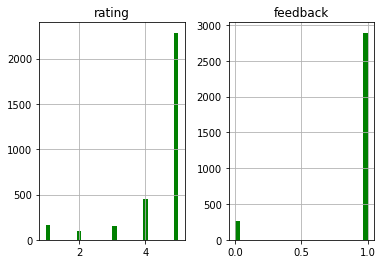

In [ ]:
review_df.hist(bins=30, color='g')

The product has an inclination towards being liked by the public as it can seen , people have given good ratings as well as are satisfied(feedback) too


In [ ]:
review_df['Length']= review_df['verified_reviews'].apply(len)

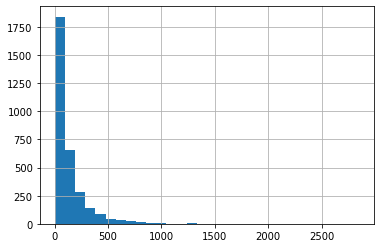

In [ ]:
review_df['Length'].hist(bins=30)

Majority of the comments fall in the character range of 0-500 characters 

In [ ]:
review_df['Length'].describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: Length, dtype: float64

In [ ]:
# new dataframe for positive (1) and negative(0) comments
positive= review_df[review_df['feedback']==1]
negative= review_df[review_df['feedback']==0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


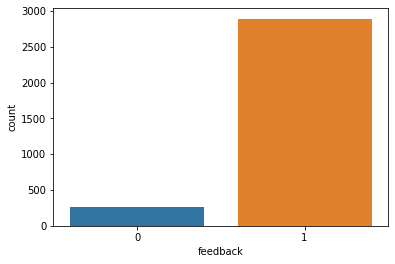

In [ ]:
sns.countplot(review_df['feedback'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


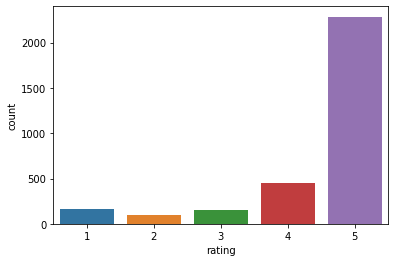

In [ ]:
sns.countplot(review_df['rating'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


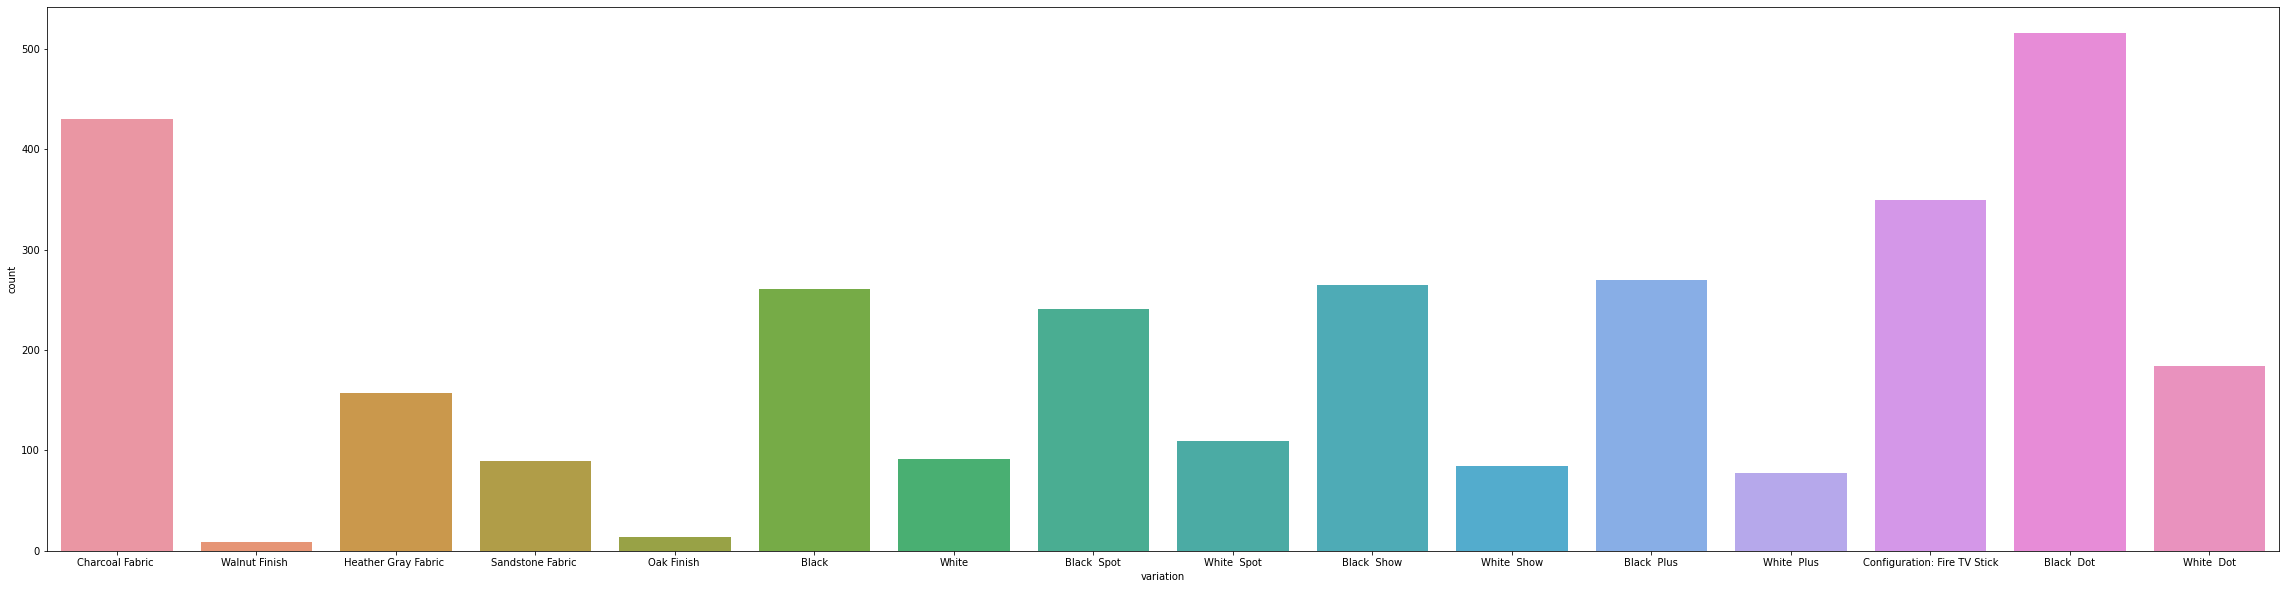

In [ ]:
plt.figure(figsize=(40,10))
sns.countplot(review_df['variation'])

Mostly people prefer to buy Black dot, followed by Charchol fabric. 
The least sold alexa is of oak & walnut finish variation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


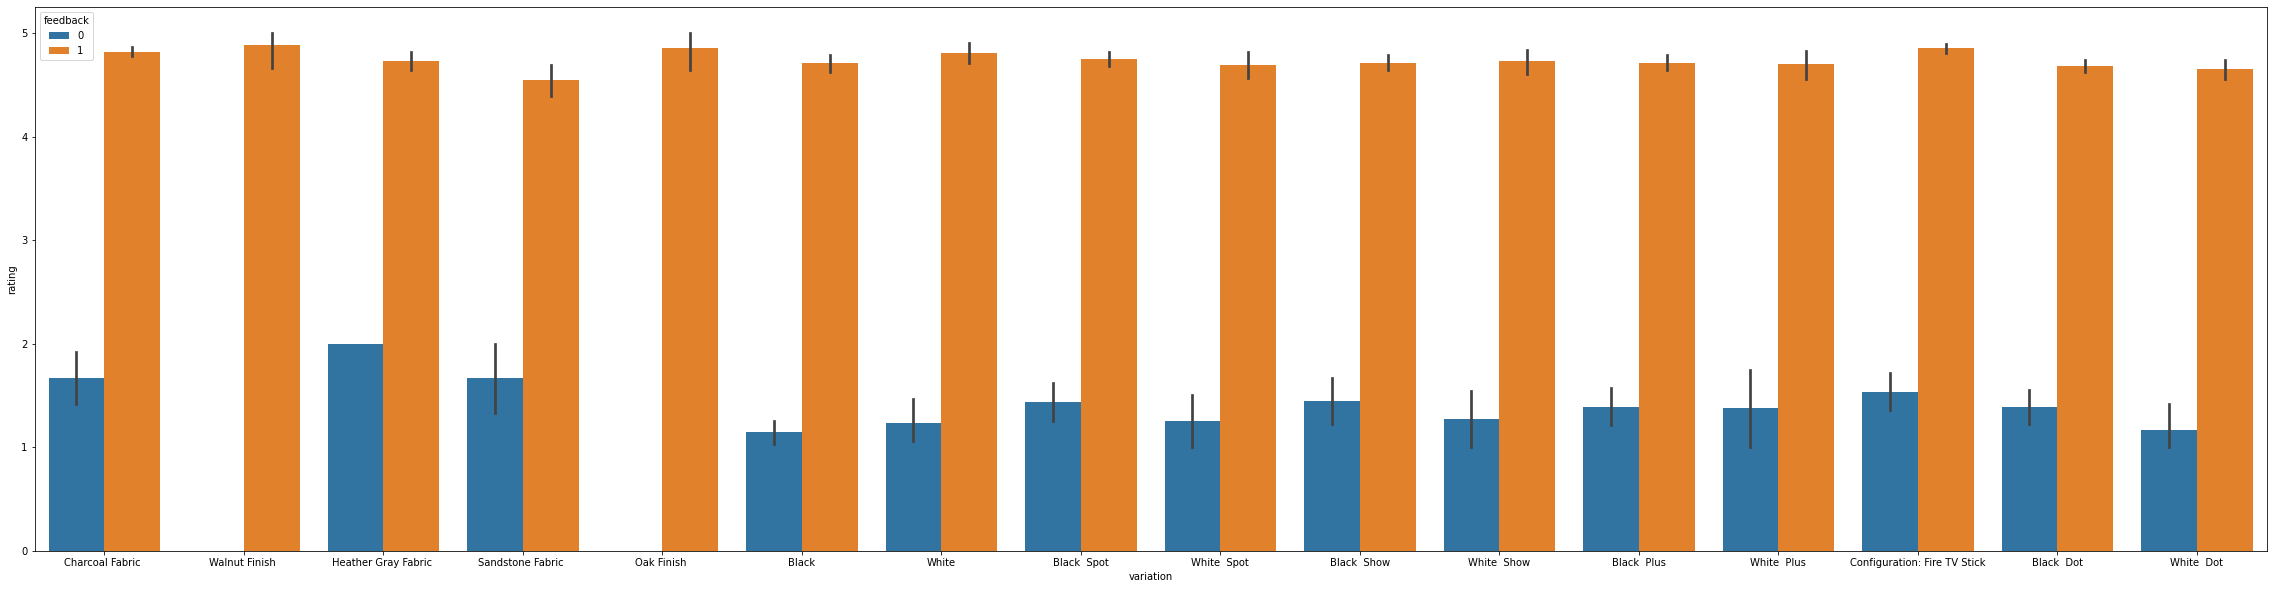

In [ ]:
# does variation have any trend with rating and feedback
plt.figure(figsize=(40,10))
# sns.barplot(x='variation',y='rating',data=review_df)


# sns.barplot(x='variation',y='feedback',data=review_df)

sns.barplot(review_df.variation,review_df.rating,review_df.feedback)

Variation doesn't have major difference on rating scale, but few variation have only positive feedback, which are walnut and oak finish, that interestingly enough have the least number of purchases.

In [ ]:
reviews= review_df['verified_reviews'].tolist()
reviews = ' '.join(reviews)

In [ ]:
reviews

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [ ]:
!pip install --upgrade wordcloud==1.8.1

     |████████████████████████████████| 366 kB 7.4 MB/s 
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0


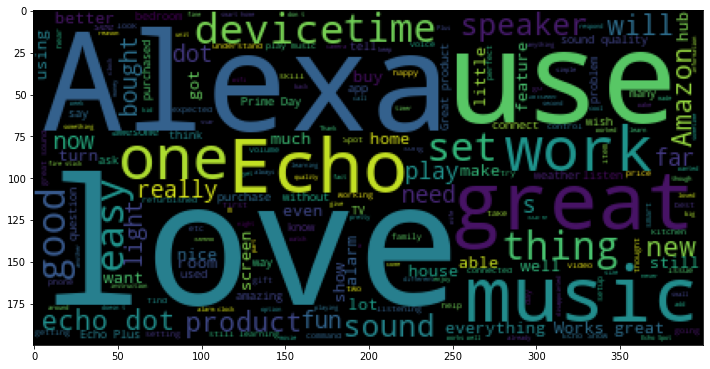

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(12,10))

plt.imshow(WordCloud().generate(reviews))

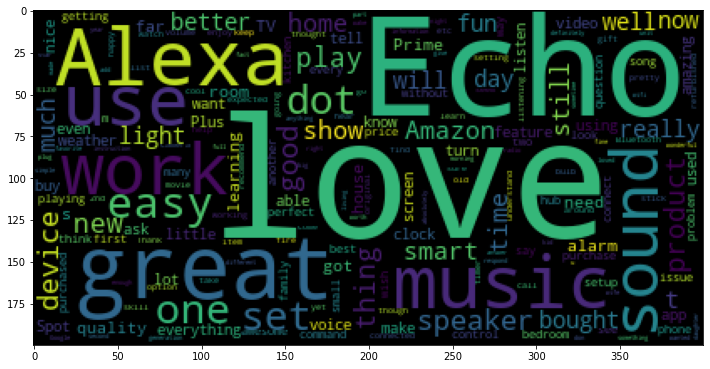

In [ ]:
# positive feedbacks

positive_string= positive['verified_reviews'].tolist()
positive_string= " ".join(positive_string)

plt.figure(figsize=(12,10))

plt.imshow(WordCloud(collocations=False).generate(positive_string))

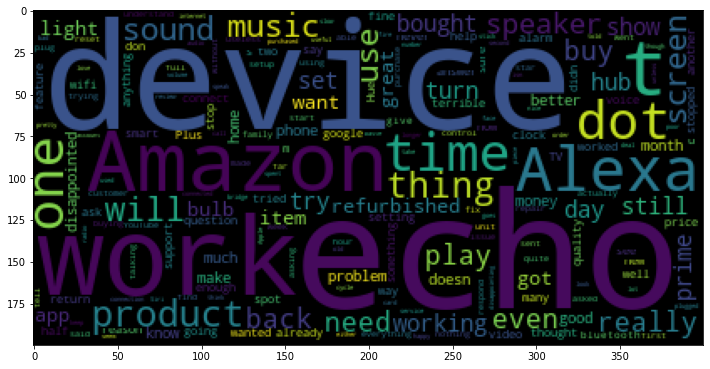

In [ ]:
# negative feedbacks

negative_string= negative['verified_reviews'].tolist()
negative_string= " ".join(negative_string)

plt.figure(figsize=(12,10))

plt.imshow(WordCloud(collocations=False,collocation_threshold = 30).generate(negative_string)) # collocations=False helps in removing repetative words 

Observations
1. Remove repetative words : done through collocation=False
2. Add general words to stopwords : done appended a list of general words to nltk stopwords list after removing stopwords, converting to lower case and lemmatizing

## Dummy variable
for Categorical column: variation

In [ ]:
# data cleaning

review_df= review_df.drop(['rating','date','Length'],axis=1)

review_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
# creating dummy for variation(categorical) column, to encode the cat. column
# drop_first, saves us from dummy trap

variation_dummy= pd.get_dummies(review_df['variation'],drop_first=True)
variation_dummy

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
review_df.drop(['variation'],axis=1, inplace=True)

In [ ]:
review_df=pd.concat([review_df, variation_dummy],axis=1)

In [ ]:
review_df.head(3)

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Cleaning
Text data cleaning and wordcloud with just the relevent keywords

In [ ]:
# remove punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
from collections import Counter
import string
string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Text(0.5, 1.0, 'Wordcloud after removing general words')

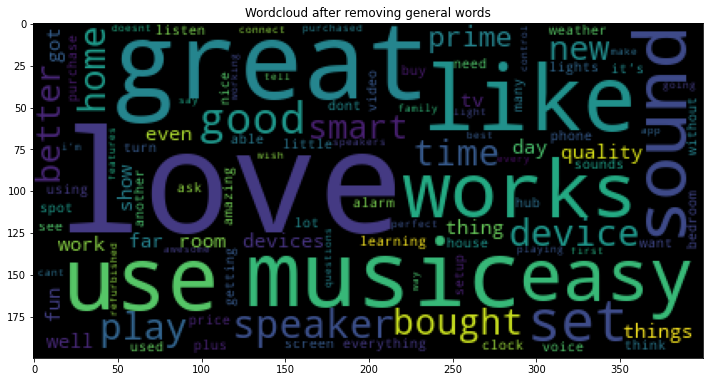

In [ ]:
# remove punctuation
review_nopunc= [char for char in reviews if char not in string.punctuation]
review_nopunc= ''.join(review_nopunc)

# Find out general words and add to general words 
# counter= Counter(review_nopunc_nostop)
# most_occur= counter.most_common(100)
# most_occur

#remove stopword
generalwords= ['Alexa','alexa','Echo','echo','dot','amazon','product','would','get','one','still','really','much','also','im','know','','could','two'] 
stopwrd = nltk.corpus.stopwords.words('english')
stopwrd.extend(generalwords)
review_nopunc_nostop= [word for word in review_nopunc.split() if word.lower() not in stopwrd]
# review_nopunc_nostop 

# again see the new list of words, if they have any general words
review_nopunc_nostop=  [word.lower() for word in review_nopunc_nostop] # Great and great were being considered different 
counter= Counter(review_nopunc_nostop)
most_occur= counter.most_common(100)
most_occur


# if not produce wordcloud using frequency count
plt.figure(figsize=(12,10))

plt.imshow(WordCloud(collocations=False).generate_from_frequencies(dict(most_occur)))
plt.title('Wordcloud after removing general words')

In [ ]:
# #remove punctuation and stopwords on record level 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')


# # remove punctuation
# review_nopunc= [char for char in reviews if char not in string.punctuation]
# review_nopunc= ''.join(review_nopunc)
# review_nopunc

# #remove stopword

# review_nopunc_nostop= [word for word in review_nopunc.split() if word.lower() not in stopwords.words('english')]
# review_nopunc_nostop 


def cleaning_data(reviews):
  review_nopunc= [char for char in reviews if char not in string.punctuation]
  review_nopunc= ''.join(review_nopunc)  

  review_nopunc_nostop= [word for word in review_nopunc.split() if word.lower() not in stopwords.words('english')]
  return (review_nopunc_nostop)

review_clean_df= review_df['verified_reviews'].apply(cleaning_data)
review_clean_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

## Count vectorizer
Convert text data into numerical values

In [ ]:
#tokenization (count vectorizer)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = cleaning_data) #clean function and apply count vectorizer at one go
reviews_countvectorizer = vectorizer.fit_transform(review_df['verified_reviews'])

In [ ]:
print(vectorizer.get_feature_names()) # get feature name gives all unique words 

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(reviews_countvectorizer.toarray())   #tokenized array

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
reviews_countvectorizer.shape #3250: comments, 5211: unique words 

(3150, 5211)

In [ ]:
review_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
review_df.drop(['verified_reviews'],axis=1, inplace=True) #dropping string value, will be replaced by encoded (count vectors) value

In [ ]:
reviews= pd.DataFrame(reviews_countvectorizer.toarray())
reviews

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
review_df= pd.concat([review_df, reviews], axis=1)
review_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Applying classification model

Testing with Naive bayes and Logistic Regression

In [ ]:
#input
X= review_df.drop(review_df['feedback'],axis=1)

In [ ]:
# target value 
y= review_df['feedback']

Naive Bayes Therom for Classifaction as this is a binary/ multi-class problem



Naive bayes are immnune to overfitting because
The Naive Bayes classifier employs a very simple (linear) hypothesis function. As a result it suffers from high bias, or error resulting from inaccuracies in its hypothesis class, because its hypothesis function is so simple it cannot accurately represent many complex situations. On the other hand, it exhibits low variance, or failure to generalize to unseen data based on its training set, because it's hypothesis class' simplicity prevents it from overfitting to its training data. As a result of this attribute Naive Bayes classifier has been shown to perform surprisingly well with very small amounts of training data that most other classifiers, and especially ANNs, would find significantly insufficient.

In [ ]:
X.shape

(3150, 5225)

In [ ]:
y.shape

(3150,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Apply Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier= MultinomialNB()
classifier.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


MultinomialNB()

Performance

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train= classifier.predict(X_train)
y_predict_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([1, 1, 1, ..., 1, 1, 1])

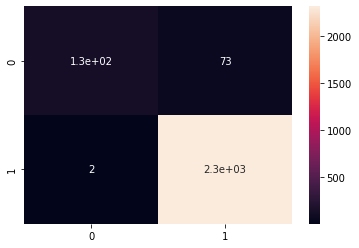

In [ ]:
cn= confusion_matrix(y_train,y_predict_train)
sns.heatmap(cn,annot=True)

Test data

In [ ]:

y_predict_test= classifier.predict(X_test)
y_predict_test

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

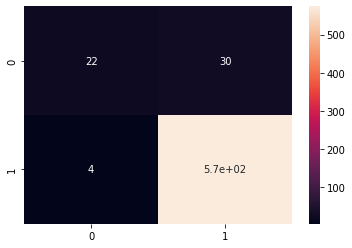

In [ ]:
cn= confusion_matrix(y_test,y_predict_test)
sns.heatmap(cn,annot=True)

Point to remember this is a unbalanced dataset, data for positive is lot more as compared to negative

In [ ]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.42      0.56        52
           1       0.95      0.99      0.97       578

    accuracy                           0.95       630
   macro avg       0.90      0.71      0.77       630
weighted avg       0.94      0.95      0.94       630



In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy {} %'.format( 100 * accuracy_score(y_predict_test, y_test)))

Accuracy 94.6031746031746 %


Apply Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


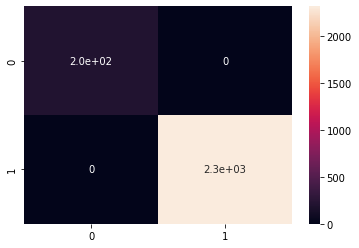

In [ ]:
y_predict_train= classifier.predict(X_train)

cm= confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

Test data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


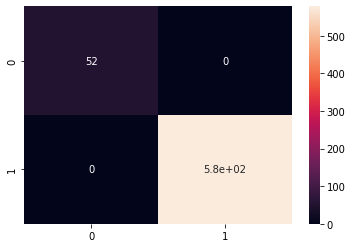

In [ ]:
y_predict_test= classifier.predict(X_test)

cm= confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00       578

    accuracy                           1.00       630
   macro avg       1.00      1.00      1.00       630
weighted avg       1.00      1.00      1.00       630



In [ ]:
print('Accuracy {} %'.format( 100 * accuracy_score(y_predict_test, y_test)))

Accuracy 100.0 %


## Result

For this data Logistic Regression passed with flying colors giving 100% accuracy unlike its counterpart Naive bayes classifier which gave a good 94% accuracy 